In [21]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [22]:
# Loading the dataset
salary = pd.read_csv('bodyfat.csv')
salary.head()
df = pd.DataFrame(salary)
df

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,1.0736,11.0,70,134.25,67.00,34.9,89.2,83.6,88.8,49.6,34.8,21.5,25.6,25.7,18.5
248,1.0236,33.6,72,201.00,69.75,40.9,108.5,105.0,104.5,59.6,40.8,23.2,35.2,28.6,20.1
249,1.0328,29.3,72,186.75,66.00,38.9,111.1,111.5,101.7,60.3,37.3,21.5,31.3,27.2,18.0
250,1.0399,26.0,72,190.75,70.50,38.9,108.3,101.3,97.8,56.0,41.6,22.7,30.5,29.4,19.8


In [23]:
#Preprocessing of the data
#Checking for any null value
salary.isnull().sum()

Density    0
BodyFat    0
Age        0
Weight     0
Height     0
Neck       0
Chest      0
Abdomen    0
Hip        0
Thigh      0
Knee       0
Ankle      0
Biceps     0
Forearm    0
Wrist      0
dtype: int64

In [24]:
# spliting into Train and Test
from sklearn.model_selection import train_test_split
x = df.drop(["BodyFat"], axis=1)
y = df["BodyFat"]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=11)

In [25]:
# Creating a Linear regression model and fit the data
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [26]:
#Predicting the model
y_pred = model.predict(x_test)
y_pred

array([22.22407813, 14.73064176,  7.85555398,  2.95064513, 21.89126141,
       20.70665117, -0.16796542, 24.40061858, 24.91660268, 16.70274772,
       15.65450106, 12.26604391, 27.58098455, 32.38724752, 12.28396269,
       11.46889294, 26.88713735, 25.43489942, 24.3029802 , 11.6075799 ,
       17.89433388, 18.92676896, 29.18692892, 10.39381841, 17.4674392 ,
        8.34637061,  5.28531592, 12.55081216,  3.69320379, 25.39472077,
       29.52034043, 11.65335508, 26.04218462, 34.90465158, 19.30811269,
        9.12840614,  7.73756773,  8.78189021, 25.24461191, 19.39986029,
       25.81848759, 22.85353543, 12.23369148, 28.3023771 , 21.46323282,
       22.20983909, 16.75844897, 25.88704714, 25.20727495, 17.68815998,
       22.08284307])

<function matplotlib.pyplot.show(close=None, block=None)>

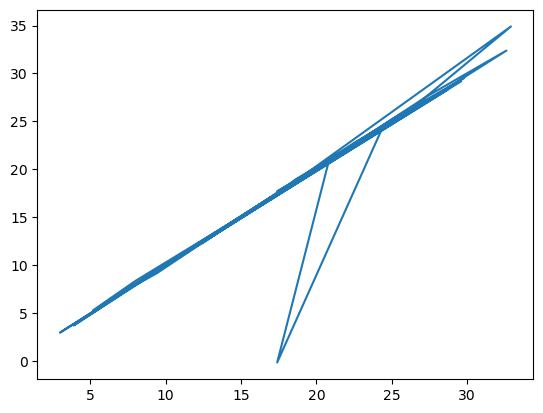

In [27]:
#plotting the Linear Regression graph of y_test,y_pred
plt.plot(y_test,y_pred)
plt.show

In [28]:
# computing the Mean absolute error,mean squared error, root mean square, and R square value

MAE = mean_absolute_error(y_test,y_pred)
MSE = mean_squared_error(y_test,y_pred)
RMS = np.sqrt(MSE)
R2 = r2_score(y_test,y_pred)

In [29]:
#printing all the values
print("Mean Absolute Error: ",MAE)
print("Mean Squared Error: ",MSE)
print("Root Mean Square: ",RMS)
print("R^2 Score: ",R2)

Mean Absolute Error:  0.5091827039983191
Mean Squared Error:  6.158011506512323
Root Mean Square:  2.4815341034352767
R^2 Score:  0.8952155946917664


In [30]:
import pickle

In [31]:
pickle.dump(model, open('model.pkl','wb'))